In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spy
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Case Studies /Yulu bikes/bike_sharing.txt")

df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


# Basic information & Data type correction

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

categorial_columns = ['season', 'holiday', 'workingday', 'weather']

for col in categorial_columns:
  df[col] = df[col].astype('object')

In [ ]:
def season_category(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'
df['season'] = df['season'].apply(season_category)

In [ ]:
df.describe(datetime_is_numeric=True)

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# Univariate Analysis

In [ ]:
df[categorial_columns].melt().rename(columns={'variable':'category'}).groupby(['category', 'value'])[['value']].count()

value
category   value        
holiday    0       10575
           1         311
season     fall     2733
           spring   2686
           summer   2733
           winter   2734
weather    1        7192
           2        2834
           3         859
           4           1
workingday 0        3474
           1        7412

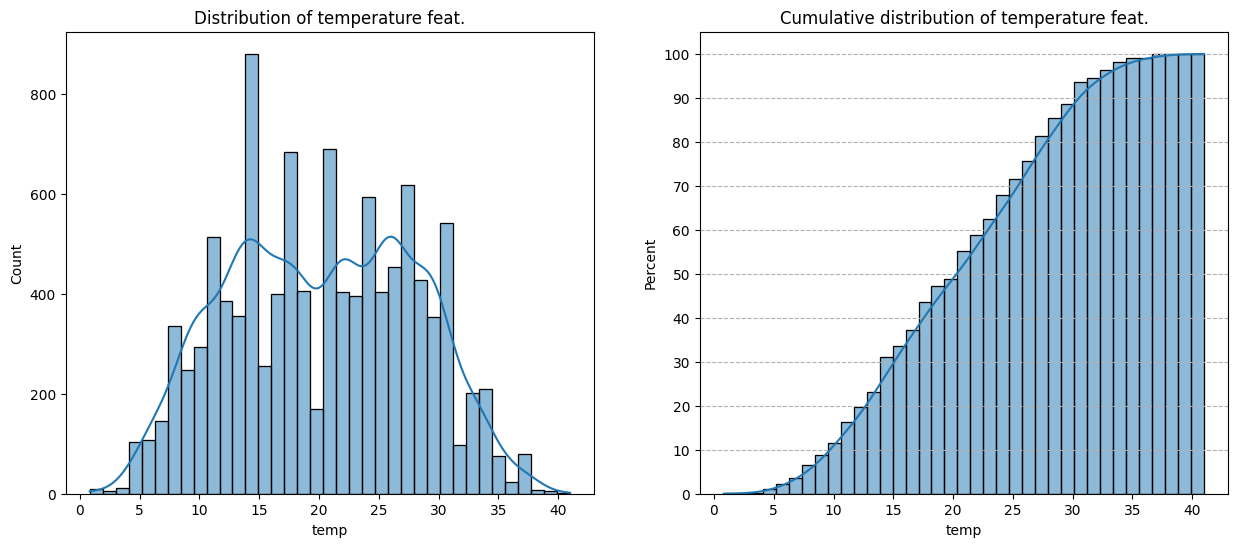

In [ ]:
fig =  plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(df['temp'], kde=True)
plt.title('Distribution of temperature feat.')


plt.subplot(1,2,2)
sns.histplot(df['temp'], kde=True, cumulative = True, stat = 'percent')
plt.title('Cumulative distribution of temperature feat.')
plt.grid(axis="y", linestyle='--')
plt.yticks(np.arange(0, 101, 10))

plt.show()

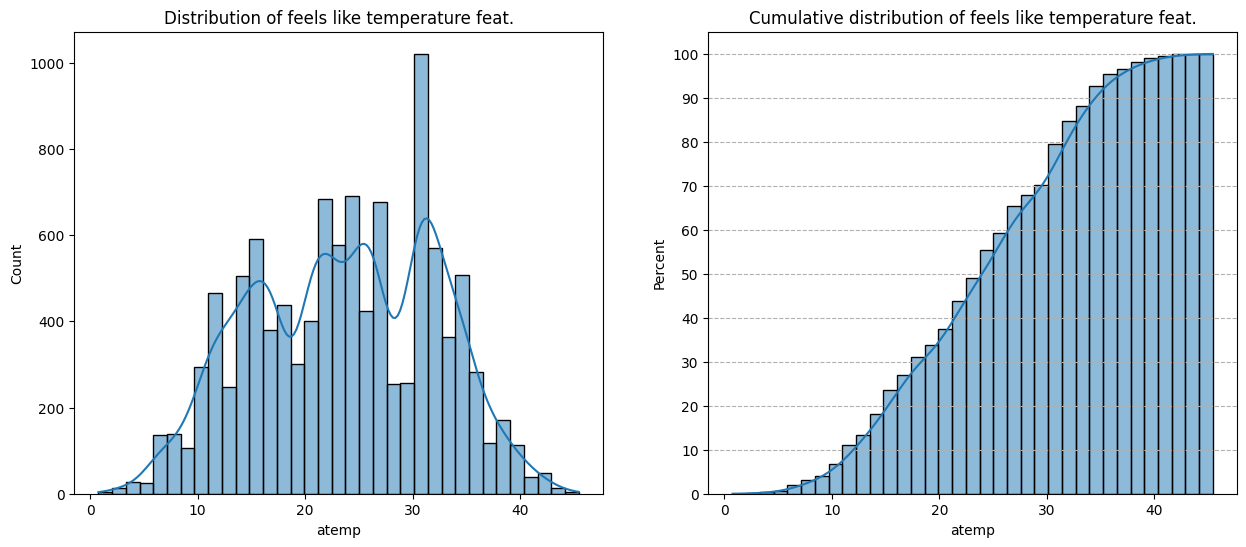

In [ ]:
fig =  plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(df['atemp'], kde=True)
plt.title('Distribution of feels like temperature feat.')


plt.subplot(1,2,2)
sns.histplot(df['atemp'], kde=True, cumulative = True, stat = 'percent')
plt.title('Cumulative distribution of feels like temperature feat.')
plt.grid(axis="y", linestyle='--')
plt.yticks(np.arange(0, 101, 10))

plt.show()

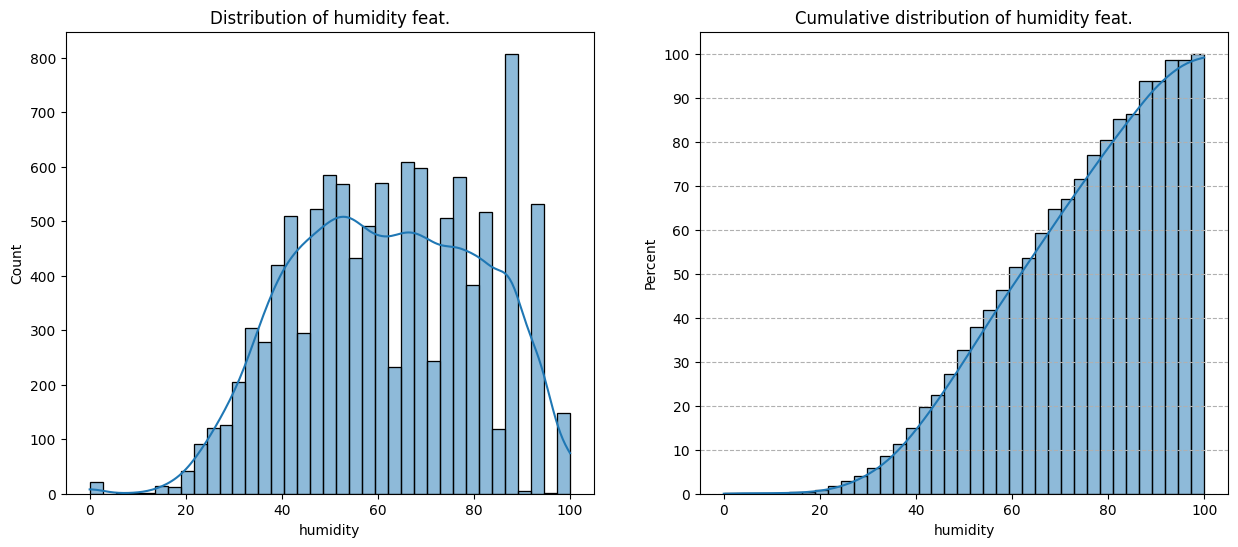

In [ ]:
fig =  plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(df['humidity'], kde=True)
plt.title('Distribution of humidity feat.')


plt.subplot(1,2,2)
sns.histplot(df['humidity'], kde=True, cumulative = True, stat = 'percent')
plt.title('Cumulative distribution of humidity feat.')
plt.grid(axis="y", linestyle='--')
plt.yticks(np.arange(0, 101, 10))

plt.show()

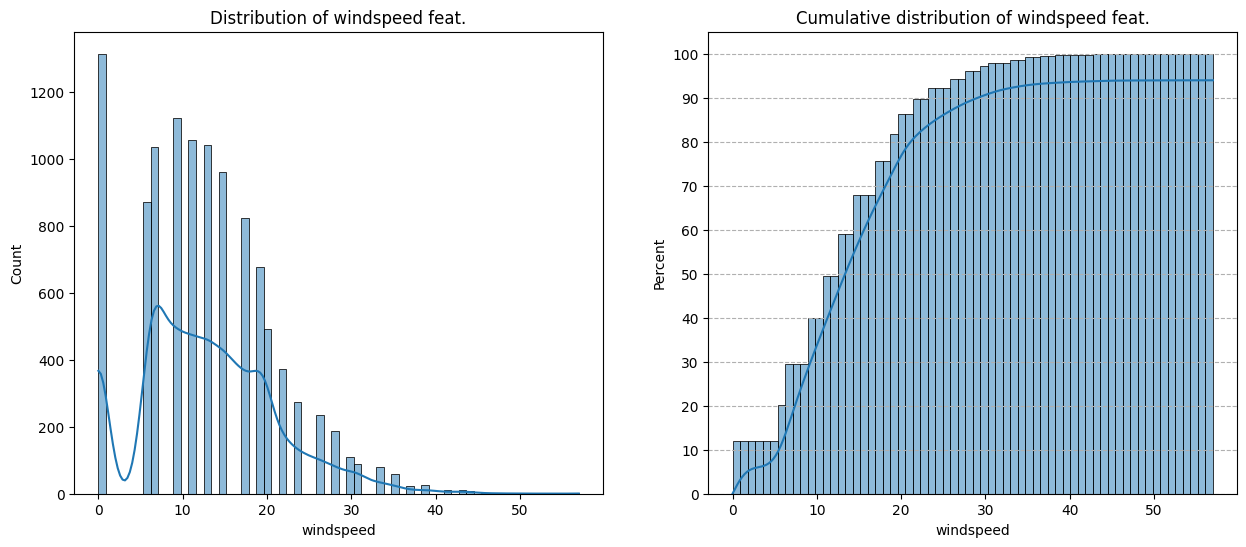

In [ ]:
fig =  plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(df['windspeed'], kde=True)
plt.title('Distribution of windspeed feat.')


plt.subplot(1,2,2)
sns.histplot(df['windspeed'], kde=True, cumulative = True, stat = 'percent')
plt.title('Cumulative distribution of windspeed feat.')
plt.grid(axis="y", linestyle='--')
plt.yticks(np.arange(0, 101, 10))

plt.show()

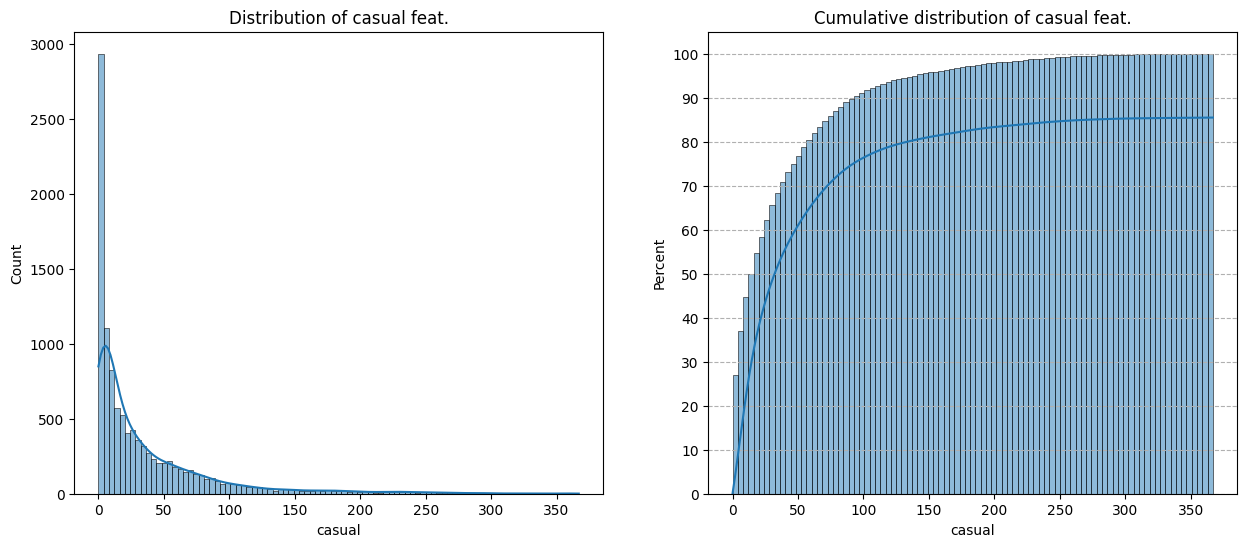

In [ ]:
fig =  plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(df['casual'], kde=True)
plt.title('Distribution of casual feat.')


plt.subplot(1,2,2)
sns.histplot(df['casual'], kde=True, cumulative = True, stat = 'percent')
plt.title('Cumulative distribution of casual feat.')
plt.grid(axis="y", linestyle='--')
plt.yticks(np.arange(0, 101, 10))

plt.show()

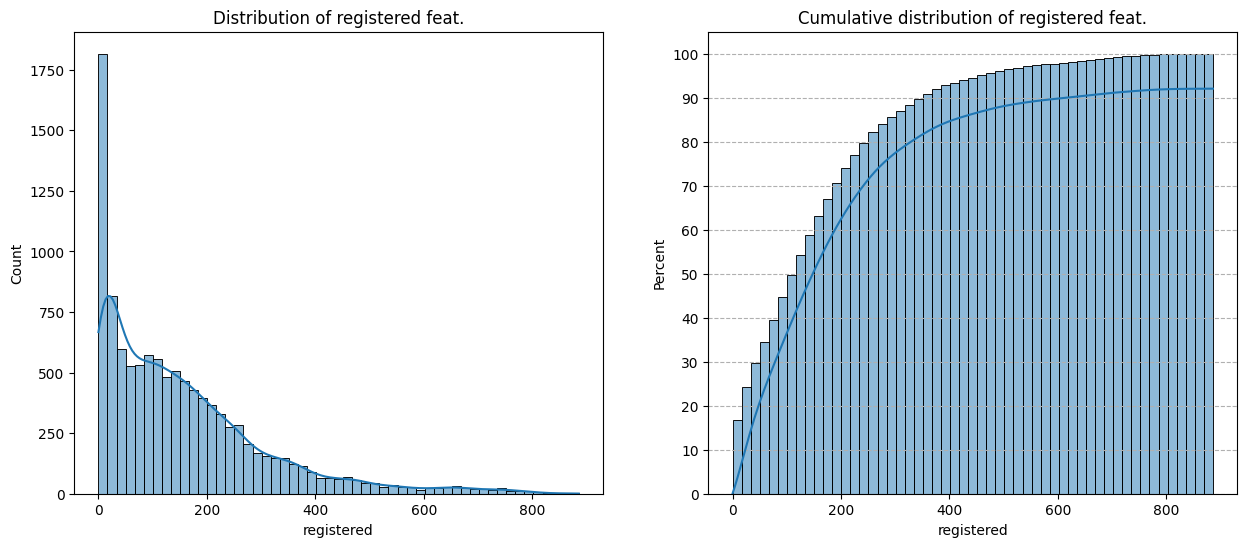

In [ ]:
fig =  plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(df['registered'], kde=True)
plt.title('Distribution of registered feat.')


plt.subplot(1,2,2)
sns.histplot(df['registered'], kde=True, cumulative = True, stat = 'percent')
plt.title('Cumulative distribution of registered feat.')
plt.grid(axis="y", linestyle='--')
plt.yticks(np.arange(0, 101, 10))

plt.show()

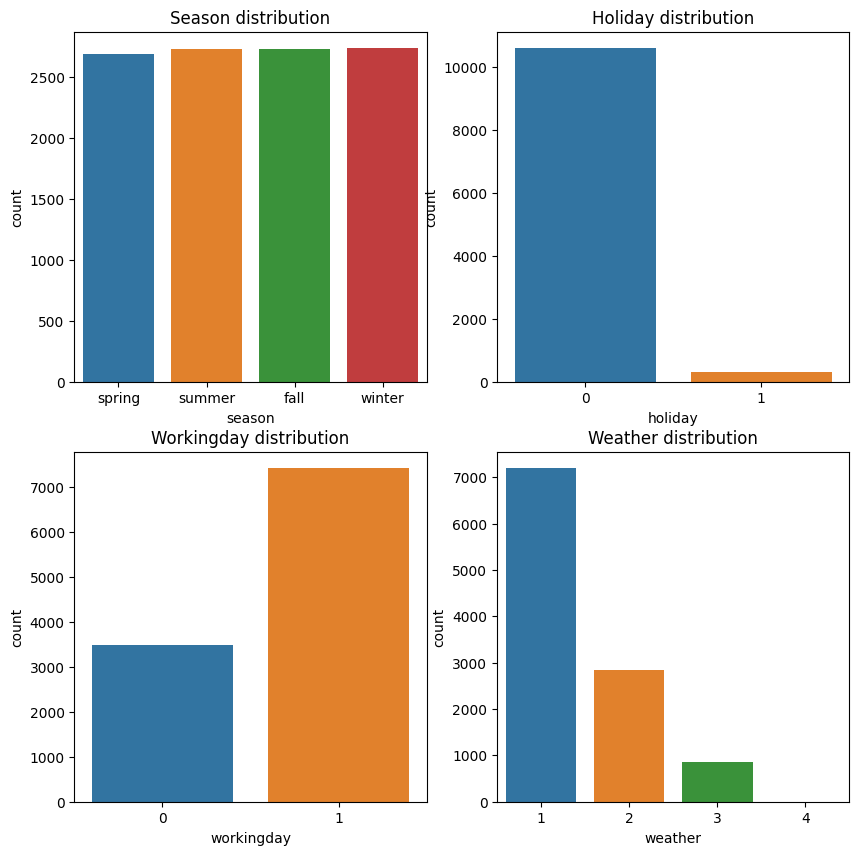

In [ ]:
fig = plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.countplot(data = df, x = 'season')
plt.title('Season distribution')


plt.subplot(2,2,2)
sns.countplot(data = df, x = 'holiday')
plt.title('Holiday distribution')

plt.subplot(2,2,3)
sns.countplot(data = df, x = 'workingday')
plt.title('Workingday distribution')

plt.subplot(2,2,4)
sns.countplot(data = df, x = 'weather')
plt.title('Weather distribution')

plt.show()

## Univariate Analysis insights based on EDA


There is no missing value present in the dataset.

More than 80% of time, temperature is less than 30 degree celcius.

More than 80% of time, feels like temperature is greater than 30 degree celcius.

Around 80% of time humidity is more than 40.

50% of time windspeed value is less than 15. Around 85% time windspeed value is less than 20.

50% of time Casual users count is around 30. and 80% of time its less than 60.

For Registerd users 80% of time count is less than 300. and 50% of time its less than 200.

Season columns contains alomost smiliar values for all seasons.

Weather columns have very few values for category 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) and 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog).



# Outliers Detection

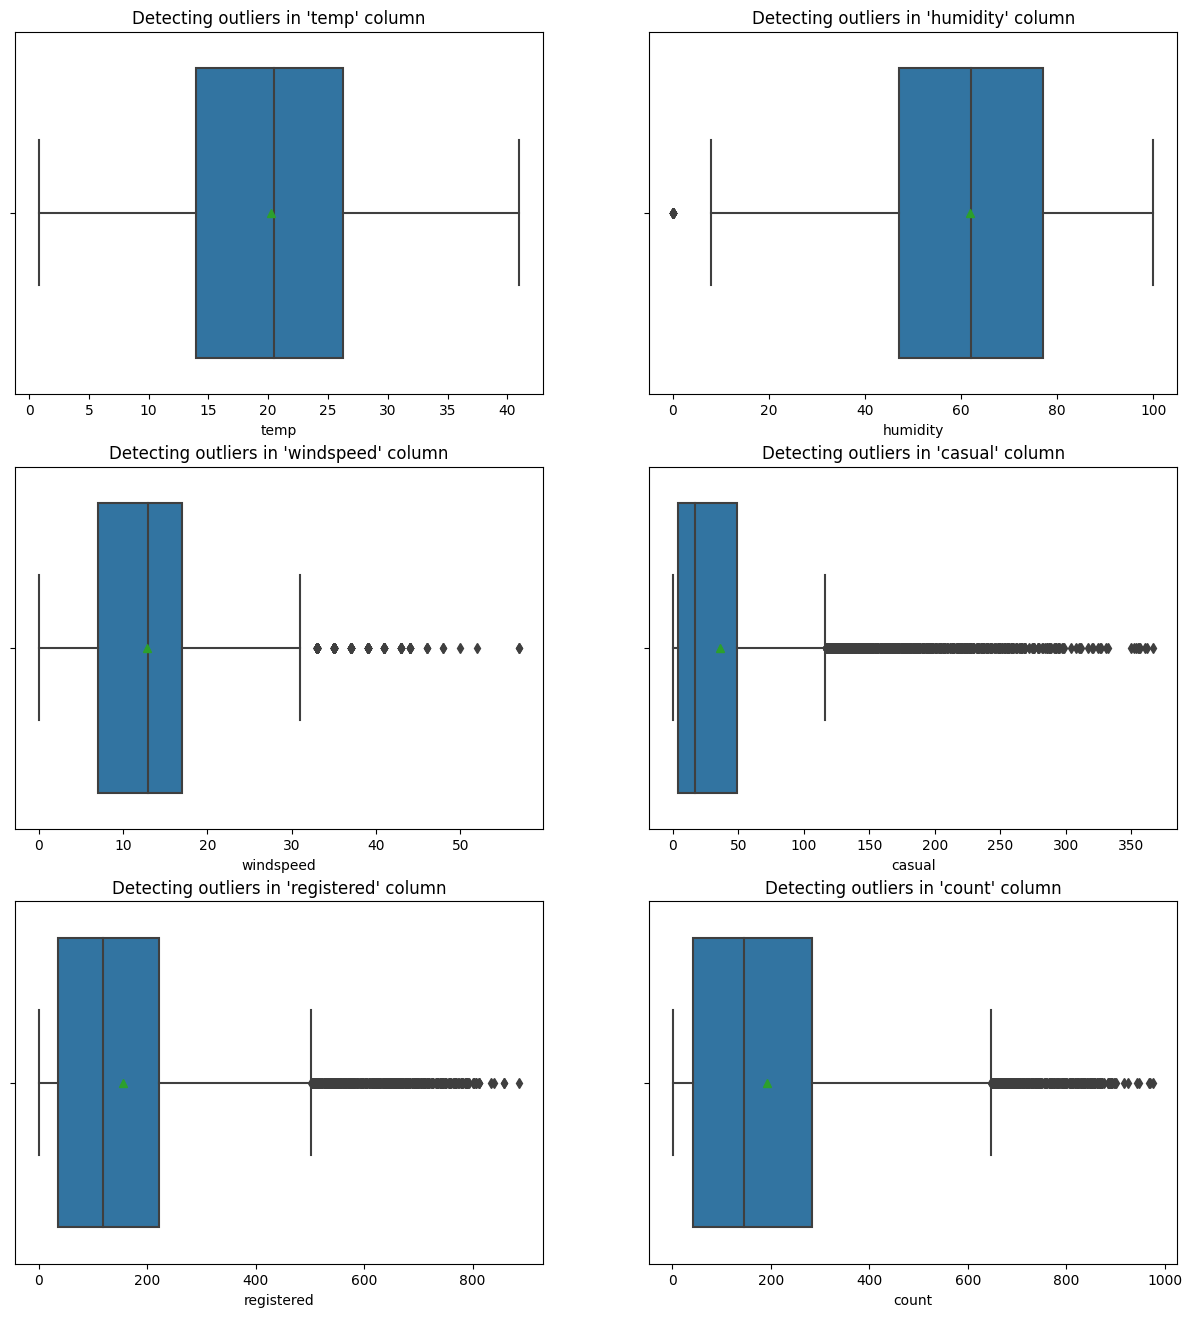

In [ ]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
colors = np.random.permutation(['red', 'blue', 'green', 'magenta', 'cyan', 'gray'])
count = 1
plt.figure(figsize = (15, 16))
for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = df, x = df[i], showmeans = True)
    plt.plot()
    count += 1

## Outliers Detection insights based on EDA

There is no outlier in the temp column.

There are few outliers present in humidity column.

There are many outliers present in each of the columns : windspeed, casual, registered, count.

# Bivariate Analysis

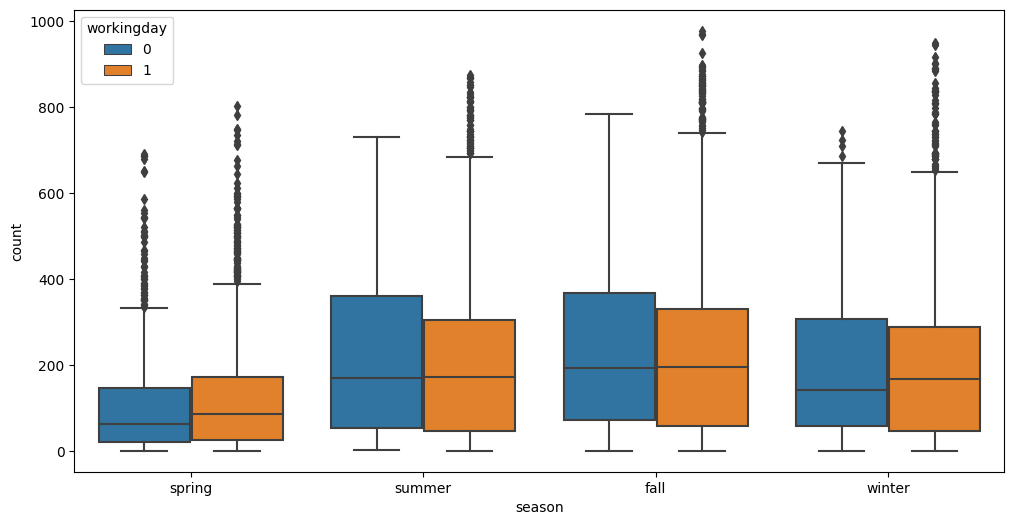

In [ ]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df, x='season', y='count', hue='workingday')
plt.show()

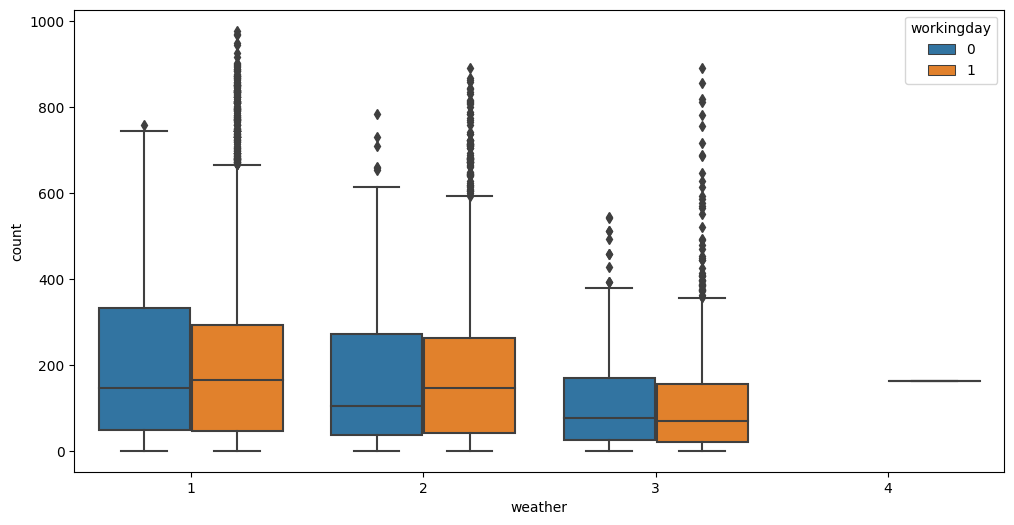

In [ ]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df, x='weather', y='count', hue='workingday')
plt.show()

## Bivariate Analysis insights based on EDA

The count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

The count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

# Time Analysis

In [ ]:
print(df['datetime'].max() - df['datetime'].min())

718 days 23:00:00


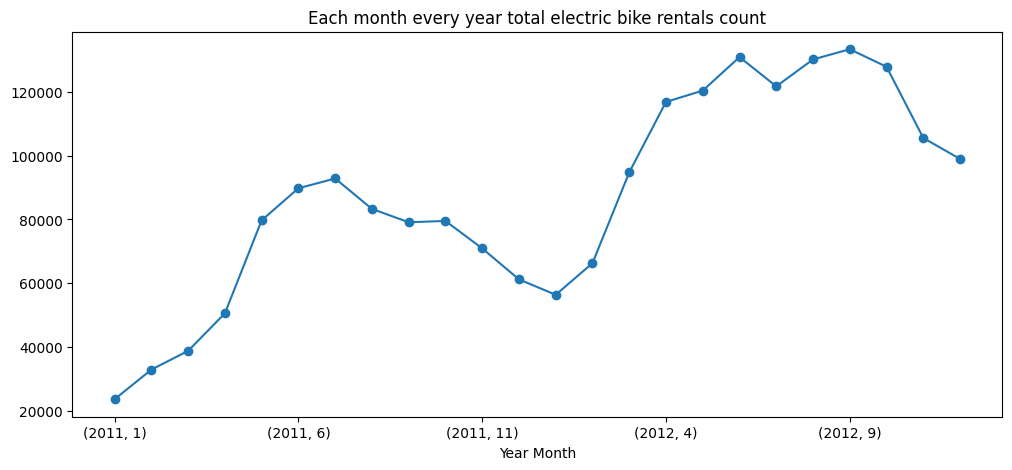

In [ ]:
plt.figure(figsize=(12,5))
df.groupby([df['datetime'].dt.year, df['datetime'].dt.month])['count'].agg('sum').plot(kind = 'line', marker = 'o')
plt.xlabel('Year Month')
plt.title('Each month every year total electric bike rentals count')
plt.show()

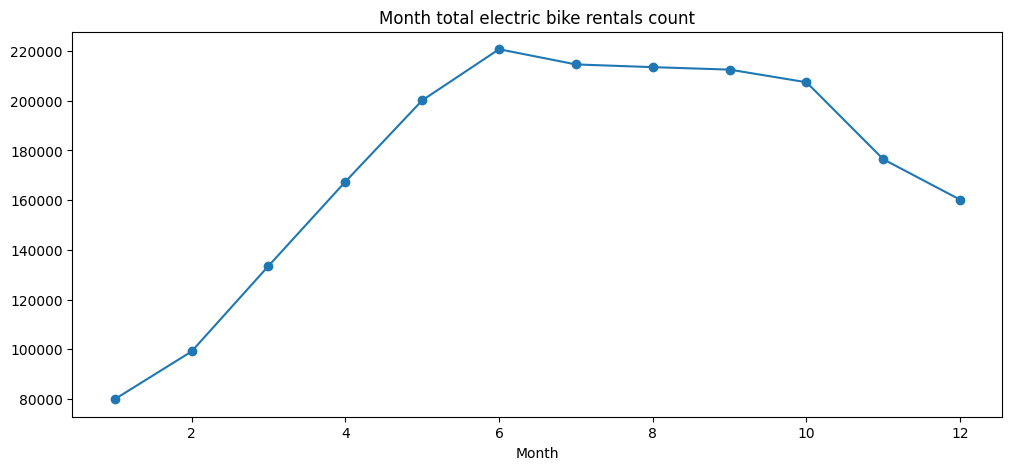

In [ ]:
plt.figure(figsize=(12,5))
df.groupby([df['datetime'].dt.month])['count'].agg('sum').plot(kind = 'line', marker = 'o')
plt.xlabel('Month')
plt.title('Month total electric bike rentals count')
plt.show()

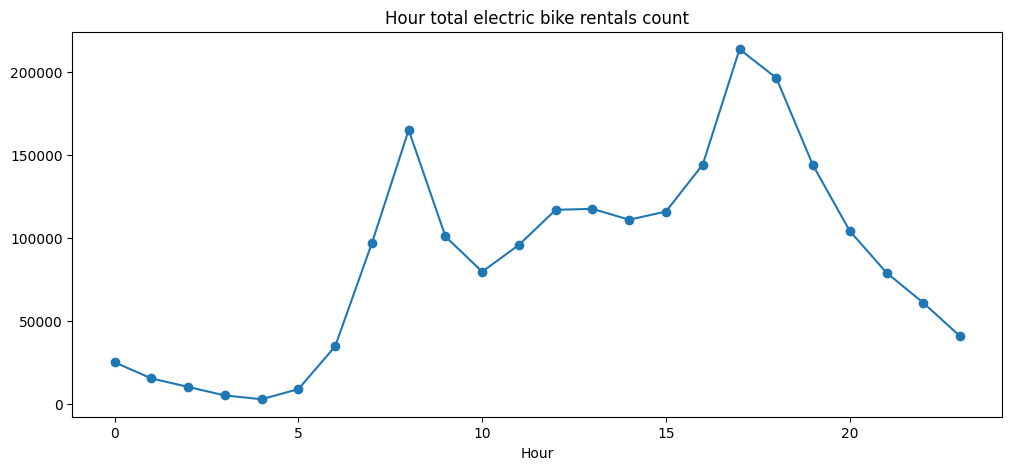

In [ ]:
plt.figure(figsize=(12,5))
df.groupby([df['datetime'].dt.hour])['count'].agg('sum').plot(kind = 'line', marker = 'o')
plt.xlabel('Hour')
plt.title('Hour total electric bike rentals count')
plt.show()

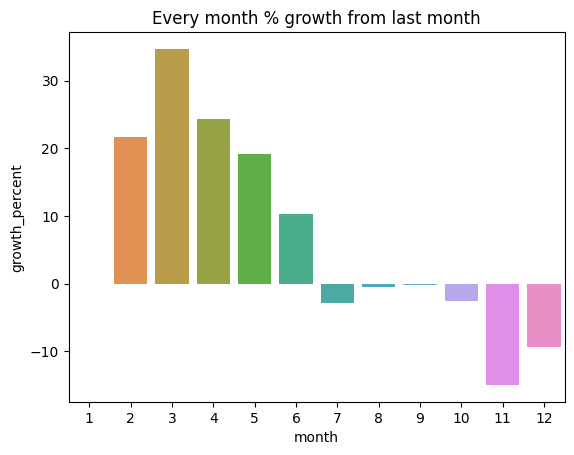

In [ ]:

month_count_mean = df.groupby(by = df['datetime'].dt.month)['count'].mean().reset_index()
month_count_mean.rename(columns = {'datetime' : 'month'}, inplace = True)

month_count_mean['prev_count'] = month_count_mean['count'].shift(1)

month_count_mean['growth_percent'] = (month_count_mean['count'] - month_count_mean['prev_count']) * 100 / month_count_mean['prev_count']


sns.barplot(data=month_count_mean, x='month', y='growth_percent')
plt.title('Every month % growth from last month')
plt.show()

## Time Analysis insights based on EDA

We Have around 719 days of data.

There is overall up going trand in rentals from 2011 to 2012

January to March there is increasing.

From July to September, there is a slight decrease in the count of rental bikes, with negative growth rates.

the count further declines from October to December, with the largest drop observed between October and November.

The average hourly count of rentals is the highest in the month of June followed by July and August.

he average hourly count of rentals is the lowest in the month of January to March.

The average count of rentals is the highest at 5 PM followed by 6 PM and 8 AM of the day.

The average count of rentals is the lowest at 4 AM followed by 3 AM and 5 AM of the day.

Low rentals in early morning than sudden hike in morning than gradual decline in afternoon and than again peck high in evening hours.

# Hypothesis Testing


## Is there any effect of Working Day on the number of electric cycles rented ?

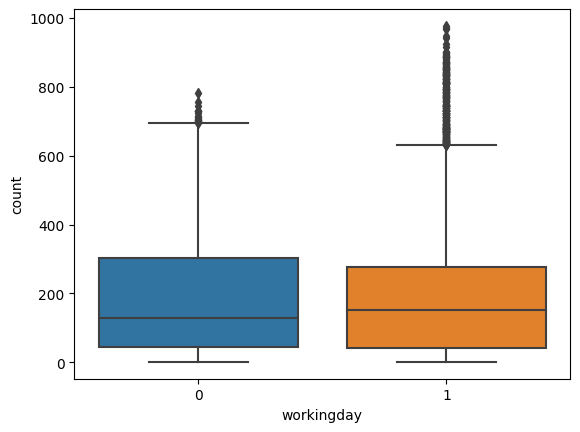

In [ ]:
sns.boxplot(data = df, x = 'workingday', y = 'count')
plt.show()

In [ ]:
df.groupby(by = 'workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


### 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented


*  **Null Hypothesis (H0)** - Working Day does not have any effect on the number of electric cycles rented.
*  **Alternate Hypothesis (HA)** - Working Day has some effect on the number of electric cycles rented.
*  **Significance level (alpha)** - 0.05





In [ ]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(df[df['workingday']==0]['count'].values, df[df['workingday']==1]['count'].values)

print('P value :', p_value)

if p_value < 0.05:
  print('Working Day has some effect on the number of electric cycles rented.')
else:
  print('Working Day does not have any effect on the number of electric cycles rented')

P value : 0.22644804226361348
Working Day does not have any effect on the number of electric cycles rented


 **Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of electric cycles being rented.**

## No. of cycles rented similar or different in different seasons ?

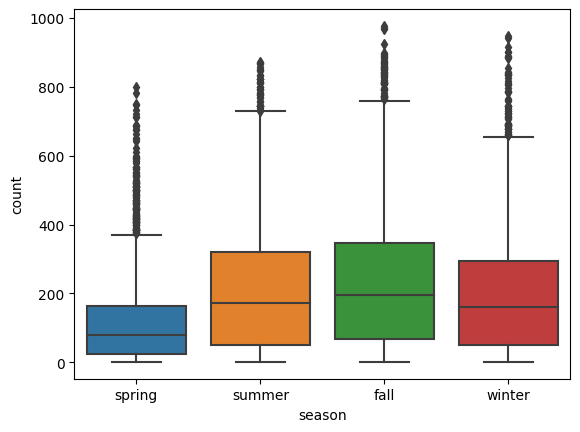

In [ ]:
sns.boxplot(data = df, x = 'season', y = 'count')
plt.show()

In [ ]:
df.groupby(by = 'season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [ ]:
s_spring = df.loc[df['season'] == 'spring', 'count']
s_summer = df.loc[df['season'] == 'summer', 'count']
s_winter = df.loc[df['season'] == 'winter', 'count']
s_fall = df.loc[df['season'] == 'fall', 'count']


### ANOVA test to check if season has an effect on the number of electric cycles rented


*  **Null Hypothesis (H0)** - Season does not have any effect on the number of electric cycles rented.
*  **Alternate Hypothesis (HA)** - Season has some effect on the number of electric cycles rented.
*  **Significance level (alpha)** - 0.05

#### Checking for basic assumpitons for the hypothesis

* More than 5 data points (sample size > 5).

* Normality check using QQ Plot Or Shapiro-Wilk test.

* Homogeneity of Variances using Levene's test.


In [ ]:
print(len(s_spring), len(s_summer), len(s_winter), len(s_fall))

2686 2733 2734 2733


#### **Normality check** using Q-Q plot

[]

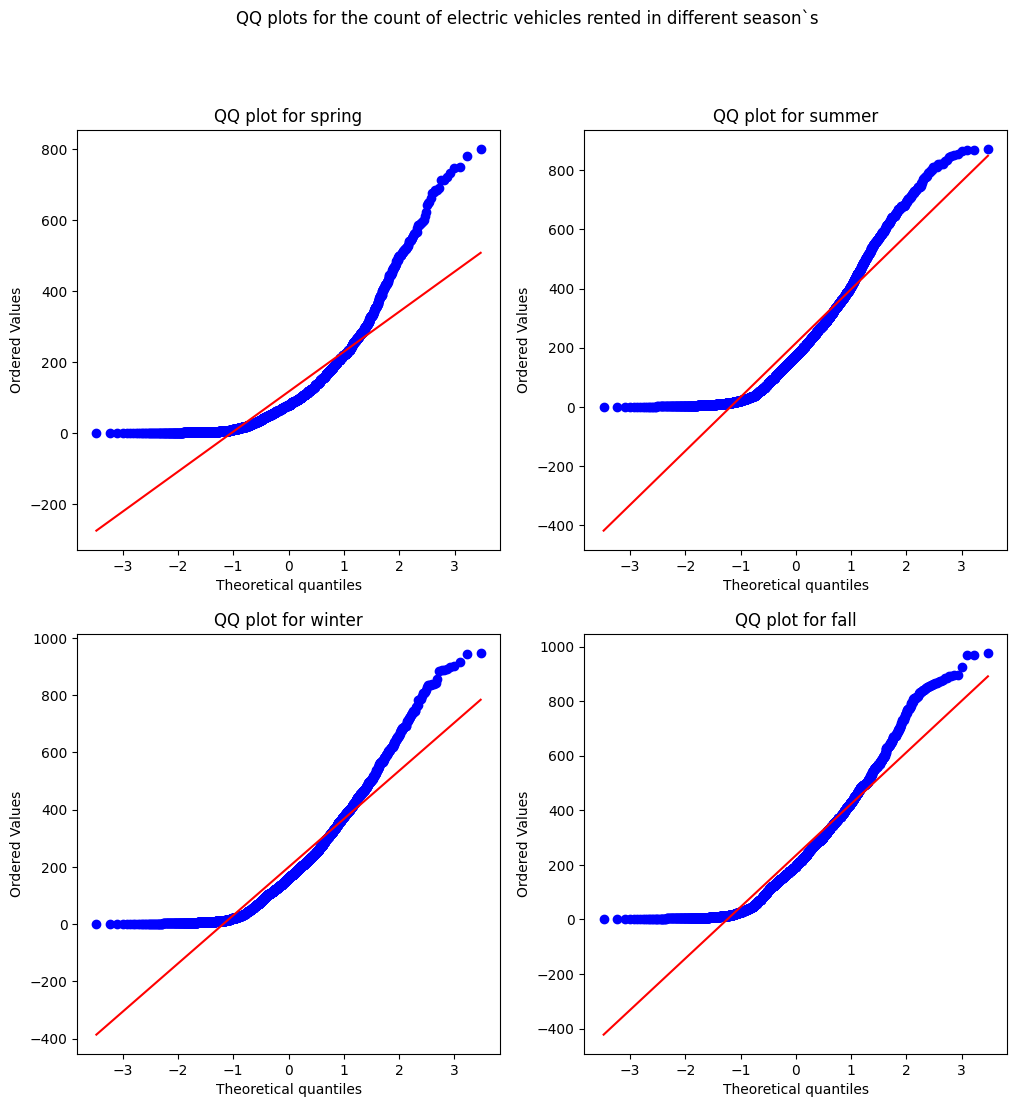

In [ ]:
plt.figure(figsize = (12, 12))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different season`s')
spy.probplot(s_spring, plot = plt, dist = 'norm')
plt.title('QQ plot for spring')
plt.subplot(2, 2, 2)
spy.probplot(s_summer, plot = plt, dist = 'norm')
plt.title('QQ plot for summer')
plt.subplot(2, 2, 3)
spy.probplot(s_winter, plot = plt, dist = 'norm')
plt.title('QQ plot for winter')
plt.plot()
plt.subplot(2, 2, 4)
spy.probplot(s_fall, plot = plt, dist = 'norm')
plt.title('QQ plot for fall')
plt.plot()

#### **Normality check** using Shapiro-Wilk test

In [ ]:
test_stat, p_value = spy.shapiro(s_spring)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(s_summer)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 6.039093315091269e-39
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(s_winter)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.1301682309549298e-39
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(s_fall)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.043458045587339e-36
The sample does not follow normal distribution


#### **Homogeneity of Variances** check using Levene's test.

In [ ]:
test_stat, p_value = spy.levene(s_spring,
                                s_summer,
                                s_winter,
                                s_fall)
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 1.0147116860043298e-118
The samples do not have  Homogenous Variance


**Anova assumpitons failed**

* We can see from Q-Q plot that none of the season follows normal distribution. Also with Shapiro-Wilk test we can confirm the same

* All season don't have same variance


#### **f_oneway test**

In [ ]:
f_stat, p_value = spy.f_oneway(s_spring, s_summer, s_winter, s_fall)

print('P value :', p_value)

if p_value < 0.05:
  print('Season has some effect on the number of electric cycles rented.')
else:
  print('Season Day does not have any effect on the number of electric cycles rented')

P value : 6.164843386499654e-149
Season has some effect on the number of electric cycles rented.


#### **kruskal test**

In [ ]:
f_stat, p_value = spy.kruskal(s_spring, s_summer, s_winter, s_fall)

print('P value :', p_value)

if p_value < 0.05:
  print('Season has some effect on the number of electric cycles rented.')
else:
  print('Season Day does not have any effect on the number of electric cycles rented')

P value : 2.479008372608633e-151
Season has some effect on the number of electric cycles rented.


 **P-value is less than 0.05 therefore, the average number of rental bikes is statistically different for different seasons.**

## No. of cycles rented similar or different in different weather ?

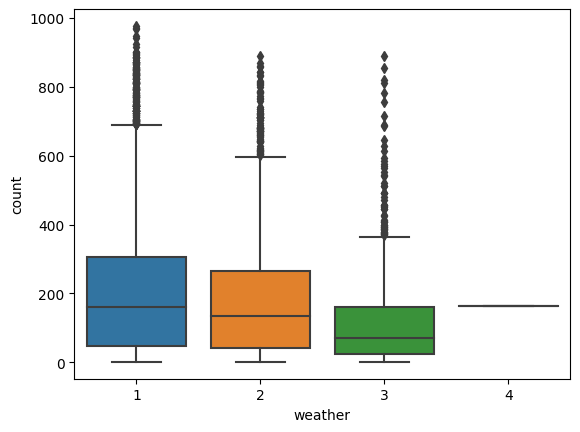

In [ ]:
sns.boxplot(data = df, x = 'weather', y = 'count')
plt.show()

In [ ]:
df.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [ ]:
w_1 = df.loc[df['weather'] == 1, 'count']
w_2 = df.loc[df['weather'] == 2, 'count']
w_3 = df.loc[df['weather'] == 3, 'count']
w_4 = df.loc[df['weather'] == 4, 'count']

### ANOVA test to check if weather has an effect on the number of electric cycles rented


*  **Null Hypothesis (H0)** - Weather does not have any effect on the number of electric cycles rented.
*  **Alternate Hypothesis (HA)** - Weather has some effect on the number of electric cycles rented.
*  **Significance level (alpha)** - 0.05

#### Checking for basic assumpitons for the hypothesis

* More than 5 data points (sample size > 5).

* Normality check using QQ Plot Or Shapiro-Wilk test.

* Homogeneity of Variances using Levene's test.

In [ ]:
print(len(w_1), len(w_2), len(w_3), len(w_4))

7192 2834 859 1


**Weather category 4 has only have one record therefore, ANOVA test excluding weather category 4**

#### **Normality check** using Q-Q plot

[]

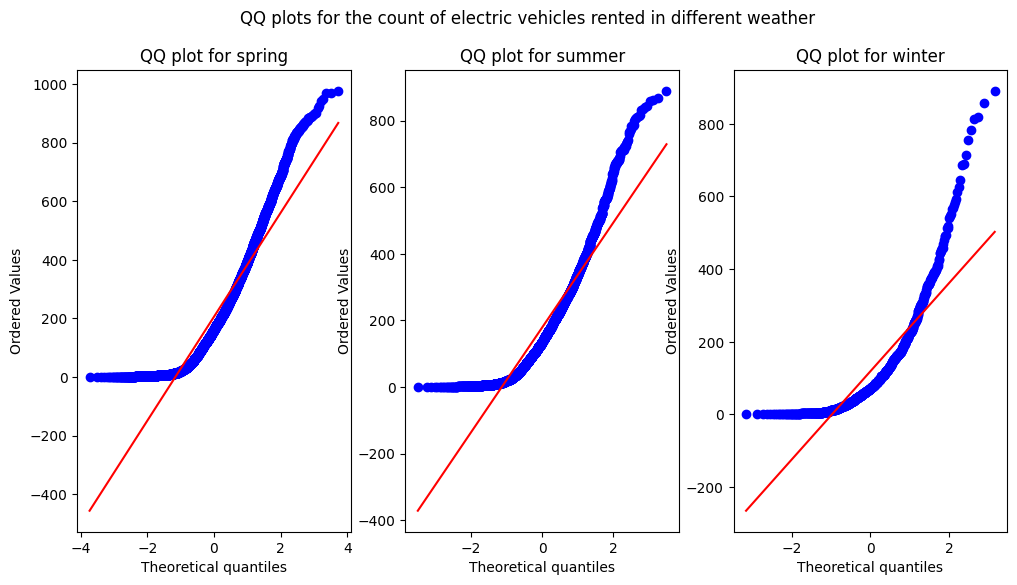

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weather')
spy.probplot(w_1, plot = plt, dist = 'norm')
plt.title('QQ plot for spring')
plt.subplot(1, 3, 2)
spy.probplot(w_2, plot = plt, dist = 'norm')
plt.title('QQ plot for summer')
plt.subplot(1, 3, 3)
spy.probplot(w_3, plot = plt, dist = 'norm')
plt.title('QQ plot for winter')
plt.plot()

#### **Normality check** using Shapiro-Wilk test

In [ ]:
test_stat, p_value = spy.shapiro(w_1)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(w_2)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.781063280987223e-43
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(w_3)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.876090133422781e-33
The sample does not follow normal distribution


**Anova assumpitons failed**

* We can see from Q-Q plot that none of the weather follows normal distribution. Also with Shapiro-Wilk test we can confirm the same

* All season don't have same variance


#### **f_oneway test**

In [ ]:
f_stat, p_value = spy.f_oneway(w_1, w_2, w_3)

print('P value :', p_value)

if p_value < 0.05:
  print('Season has some effect on the number of electric cycles rented.')
else:
  print('Season Day does not have any effect on the number of electric cycles rented')

P value : 4.976448509904196e-43
Season has some effect on the number of electric cycles rented.


#### **kruskal test**

In [ ]:
f_stat, p_value = spy.kruskal(w_1, w_2, w_3)

print('P value :', p_value)

if p_value < 0.05:
  print('Season has some effect on the number of electric cycles rented.')
else:
  print('Season Day does not have any effect on the number of electric cycles rented')

P value : 3.122066178659941e-45
Season has some effect on the number of electric cycles rented.


 **P-value is less than 0.05 therefore, the average number of rental bikes is statistically different for different weather.**

## Weather is dependent on the season ?

In [ ]:
df[['weather', 'season']].describe()

,weather,season
count,10886,10886
unique,4,4
top,1,winter
freq,7192,2734


In [ ]:
season_weather_data = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
season_weather_data

Observed values:


weather,1,2,3,4
season,,,,
fall,1930,604,199,0
spring,1759,715,211,1
summer,1801,708,224,0
winter,1702,807,225,0


### Chi Square test to check if Weather is dependent on the season


*  **Null Hypothesis (H0)** - Weather is independent on the season.
*  **Alternate Hypothesis (HA)** - Weather is dependent on the season.
*  **Significance level (alpha)** - 0.05

In [ ]:
chi_stat, p_vlaue, df, expected = spy.chi2_contingency(season_weather_data)

print('P value :', p_value)

if p_value < 0.05:
  print('Weather is dependent on the season.')
else:
  print('Weather is independent on the season.')

P value : 3.122066178659941e-45
Weather is dependent on the season.


**There is statistically significant dependency of weather and season based on the number of number of bikes rented.**

## Univariate Analysis insights based on EDA


There is no missing value present in the dataset.

More than 80% of time, temperature is less than 30 degree celcius.

More than 80% of time, feels like temperature is greater than 30 degree celcius.

Around 80% of time humidity is more than 40.

50% of time windspeed value is less than 15. Around 85% time windspeed value is less than 20.

50% of time Casual users count is around 30. and 80% of time its less than 60.

For Registerd users 80% of time count is less than 300. and 50% of time its less than 200.

Season columns contains alomost smiliar values for all seasons.

Weather columns have very few values for category 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) and 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog).

<br>
<br>


## Outliers Detection insights based on EDA

There is no outlier in the temp column.

There are few outliers present in humidity column.

There are many outliers present in each of the columns : windspeed, casual, registered, count.

<br>
<br>

## Bivariate Analysis insights based on EDA

The count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

The count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

<br>
<br>

## Time Analysis insights based on EDA

We Have around 719 days of data.

There is overall up going trand in rentals from 2011 to 2012

January to March there is increasing.

From July to September, there is a slight decrease in the count of rental bikes, with negative growth rates.

the count further declines from October to December, with the largest drop observed between October and November.

The average hourly count of rentals is the highest in the month of June followed by July and August.

he average hourly count of rentals is the lowest in the month of January to March.

The average count of rentals is the highest at 5 PM followed by 6 PM and 8 AM of the day.

The average count of rentals is the lowest at 4 AM followed by 3 AM and 5 AM of the day.

Low rentals in early morning than sudden hike in morning than gradual decline in afternoon and than again peck high in evening hours.

<br>
<br>


## Hypothesis testing conclusion

**Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of electric cycles being rented.**

 **P-value is less than 0.05 therefore, the average number of rental bikes is statistically different for different seasons and different weathers.**

 **There is statistically significant dependency of weather and season based on the number of number of bikes rented.**

# Recommendations

**Seasonal Marketing -** Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

**Time-based Pricing -** Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

**Weather-based Promotions -** Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.